In [1]:
import pickle
import os
from ml_aspade import ml_aspade_train
# from train_eval import preprocess_training_data, train_and_save_model, evaluate_model
from train_eval import train_and_save_model, evaluate_model
from training_data_gen import training_data

# Training Dataset Generation

In [ ]:
# audio_dir = "sounds/Heart_sounds"
# output_path = "training_data"

# target_fs_values = [2000]
# clipping_thresholds = [0.15]
# time_clip = [1]

# # Run training pipeline
# training_data = training_data(
#     audio_dir=audio_dir,
#     output_path=output_path,
#     target_fs_values=target_fs_values,
#     clipping_thresholds=clipping_thresholds,
#     time_clip=time_clip
# )

# # Save using pickle
# with open(os.path.join(output_path, 'training_data.pkl'), 'wb') as f:
#     pickle.dump(training_data, f)    

# Training


Starting model training...
Number of training samples: 1710
Initializing ML engine...
Input dimension: 2000, Output dimension: 2000
Epoch 2000/2000 | Loss: 0.3244 | Est: 0.3244 | Spar: 0.0000 | Acc: 100.00%
Training complete.


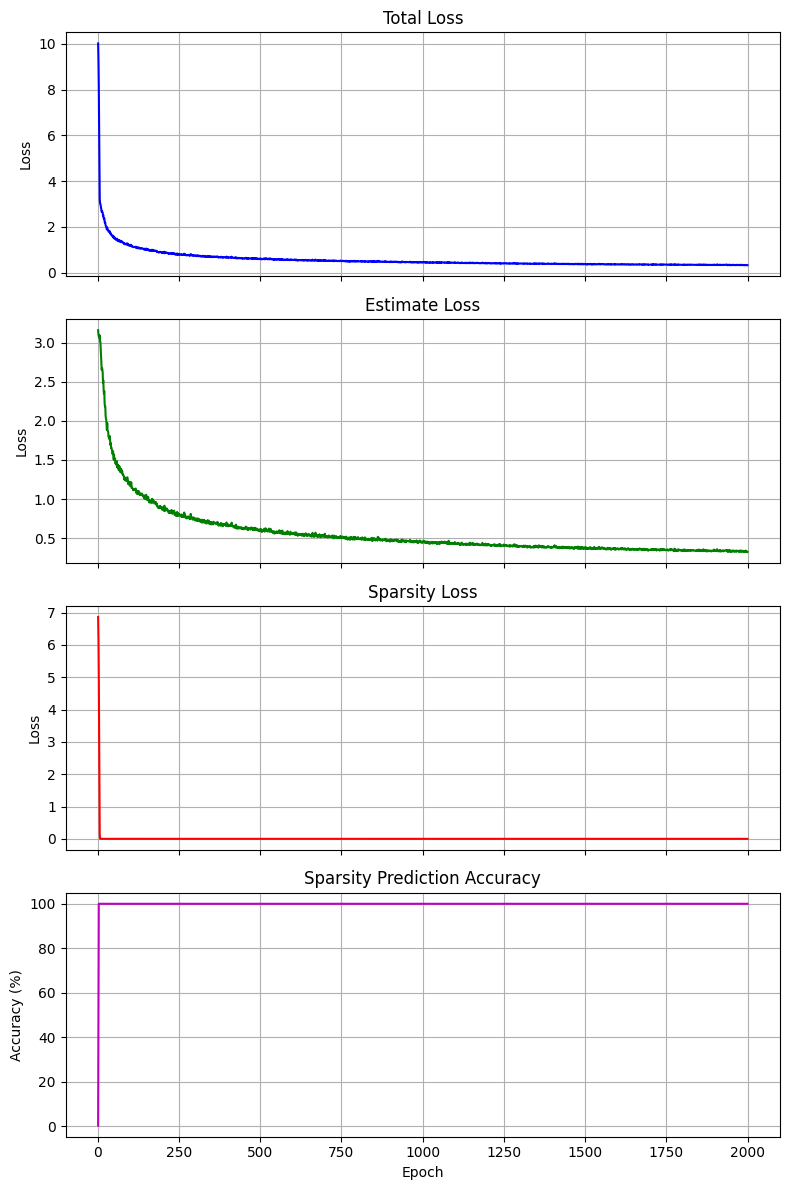

Model Saved


In [2]:
output_path = "training_data"
model_path = "sparsity_model.pth"
k_classes = 1000
# Using pickle
with open(os.path.join(output_path, 'training_data.pkl'), 'rb') as f:
    training_data = pickle.load(f)


# Train the model
print("\nStarting model training...")
print(f"Number of training samples: {len(training_data)}")

print("Initializing ML engine...")

# X_train, y_train, k_train = preprocess_training_data(training_data)

# # Example usage
# model = train_and_save_model(X_train, y_train, k_train, model_path, k_classes, num_epochs=1000, lr=1e-3)

# print("Model Saved")
# Train directly with the training data
model = train_and_save_model(training_data, model_path, num_epochs=2000, lr=1e-3, batch_size=512)
print("Model Saved")


# Evaluation

Evaluating configurations:   0%|          | 0/1 [00:00<?, ?it/s]


Processing: sound1.wav
Generating clipped signal...


/data2/AAG/MTech_Project/spade_segmentation.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  data_rec_fin[idx] = data_rec_fin[idx] + data_rec_block * gsyn
Processing: 100%|██████████| 19/19 [00:02<00:00,  8.20iteration/s]


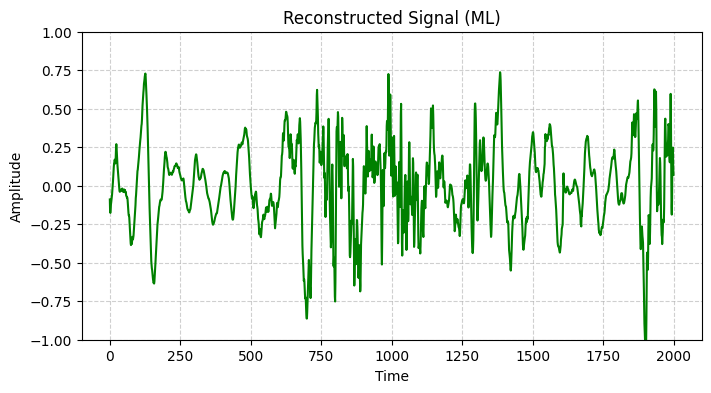

Evaluating configurations: 100%|██████████| 1/1 [00:02<00:00,  2.52s/it]



Evaluation Summary:
                        sdr_improvement     processing_time clipped_percentage
                                   mean std            mean               mean
fs   threshold duration                                                       
2000 0.15      1                   4.42 NaN            2.32               52.5


In [3]:
sparsity_model_path = "sparsity_model.pth"
test_audio_dir = "test_data"
output_dir = "/data2/AAG/MTech_Project"

target_fs_values = [2000]
clipping_thresholds = [0.15]
time_clip = [1]
k_classes = 1000

# Run evaluation
results_df, summary = evaluate_model(
    test_audio_dir=test_audio_dir,
    output_dir=output_dir,
    target_fs_values=target_fs_values,
    clipping_thresholds=clipping_thresholds,
    time_clip=time_clip,
    model_path=sparsity_model_path,
    k_classes=k_classes)

# Print summary statistics
print("\nEvaluation Summary:")
print(summary)
